In [2]:
# Import libraries
import os  # For interacting with the file system
import shutil  # For managing files and directories in a cross-platform manner
import keras  # For building deep learning models
import numpy as np  # For numerical operations on arrays
from glob import glob  # For finding file paths
from tqdm import tqdm  # For progress bars

# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image data augmentation

# Data visualization
import seaborn as sns  # For statistical visualizations
import plotly.graph_objs as go  # For interactive visualizations
import matplotlib.pyplot as plt  # For creating static plots

# Model architecture
from keras import Sequential  # For building sequential models
from keras.models import load_model  # For loading pre-trained models
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout  # For defining model layers

# Training callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping  # For training callbacks

# Pre-trained models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2  # For using pre-trained models


In [5]:
pip install tensorflow


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 1.3 MB/s eta 0:04:54
   ---------------------------------------- 0.3/385.2 MB 1.6 MB/s eta 0:04:05
   ---------------------------------------- 0.5/385.2 MB 2.0 MB/s eta 0:03:12
   ---------------------------------------- 0.7/385.2 MB 2.5 MB/s eta 0:02:32
   ---------------------------------------- 0.8/385.2 MB 2.6 MB/s eta 0:02:27
   ---------------------------------------- 1.1/385.2 MB 3.1 MB/s eta 0:02:04
   ---------------------------------------- 1.4/385.2 MB 3.5 MB/s eta 0:01:51
   ---------------------------------------- 1.6/385.2 MB 3.5 MB/s eta 0:01:49
   ---------------------------------------- 2.0/385.2 MB 3.9 MB/s eta 0:01:39
   ---------------------------------------- 2.1/385.2 MB 4.1 MB/s eta 0:01:34
   ---

In [3]:
# Set the path to the dataset
data_path = "C:/Users/Admin/Desktop/waste detection model/garbage_classification"

# Get a list of class names from the data path
class_names = sorted(os.listdir(data_path))

# Count the number of classes
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
Number of Classes: 12


In [4]:
# Get the number of samples in each class
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [945, 985, 607, 891, 5325, 629, 769, 1050, 865, 1977, 697, 775]


In [5]:
# to convert lists to dictionary **************
class_name_size = dict(zip(class_names, class_sizes))

In [6]:
class_name_size

{'battery': 945,
 'biological': 985,
 'brown-glass': 607,
 'cardboard': 891,
 'clothes': 5325,
 'green-glass': 629,
 'metal': 769,
 'paper': 1050,
 'plastic': 865,
 'shoes': 1977,
 'trash': 697,
 'white-glass': 775}

In [7]:
# Define the data
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

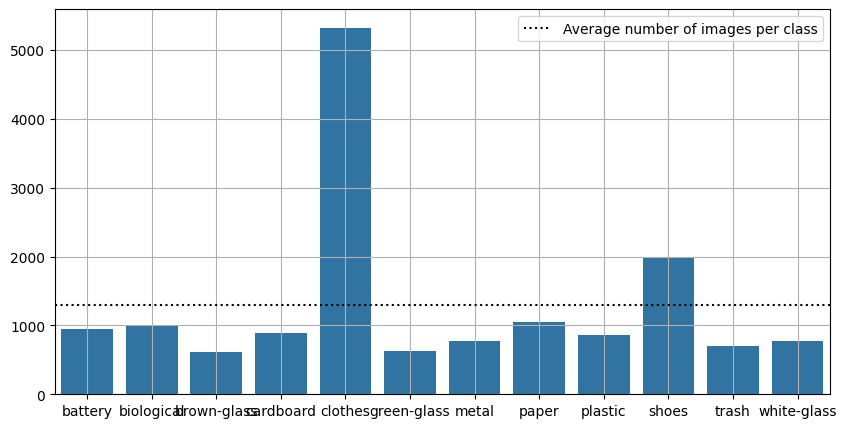

In [8]:
# Plot a bar graph of the number of images in each class

# Set the size of the figure
plt.figure(figsize=(10,5))

# Plot a bar chart using the class names as the x-axis and class sizes as the y-axis
sns.barplot(x=class_names, y=class_sizes)

# Add a grid to the plot
plt.grid()

# Add a horizontal line to show the mean number of images across all classes
plt.axhline(np.mean(class_sizes), color='black', linestyle=':', label="Average number of images per class")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [9]:
np.min(class_sizes)

607

In [10]:
# Set the path to the directory where the sampled data will be saved
sampled_data_path = './sampled-data'

# Create the sampled data directory if it doesn't exist
if not os.path.exists(sampled_data_path):
    os.mkdir(sampled_data_path)

# Set the percentage of each class to sample
sample_percent = 0.1

# Define a dictionary that maps the original class names to their English names
class_names_dict = {
    'battery': 'battery',
    'biological': 'biological',
    'brown-glass': 'brown-glass',
    'cardboard': 'cardboard',
    'clothes': 'clothes',
    'green-glass': 'green-glass',
    'metal': 'metal',
    'paper': 'paper',
    'plastic': 'plastic',
    'shoes': 'shoes',
    'trash': 'trash',
    'white-glass': 'white-glass'
    }

# Loop through each class directory and copy 2000 images or less to the sampled data directory
for class_name in os.listdir(data_path):
    # Get the path to the original class directory
    class_path = os.path.join(data_path, class_name)
    # Get the English name of the class
    class_name_en = class_names_dict[class_name]
    # Get the path to the sampled class directory
    sampled_class_path = os.path.join(sampled_data_path, class_name_en)
    # Create the sampled class directory and fill it up only if it doesn't exist ********
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
        # Get a list of all the image files in the class directory
        image_files = os.listdir(class_path)
        # Calculate the number of images to sample **************
        image_class_size = class_name_size[class_name]
        if image_class_size > 2000:
            num_images = 2000
        else:
            num_images = int(image_class_size)
        # Sample the images
        sampled_images = np.random.choice(image_files, size=num_images, replace=False)
        # Copy the sampled images to the sampled class directory
        for image_name in sampled_images:
            src_path = os.path.join(class_path, image_name)
            dst_path = os.path.join(sampled_class_path, image_name)
            shutil.copyfile(src_path, dst_path)


In [11]:
# Get a list of class names from the sampled data directory
class_names = sorted(os.listdir(sampled_data_path))

# Get the number of samples in each class
class_sizes = []
for name in class_names:
    # Get the number of samples in the class directory
    class_size = len(os.listdir(os.path.join(sampled_data_path, name)))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)


Class Distribution:
 [945, 985, 607, 891, 2000, 629, 769, 1050, 865, 1977, 697, 775]


In [12]:
# Define the data
data = go.Pie(labels=class_names, values=class_sizes)

# Define the layout
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
    # Initialize Generator with the specified image transformations and preprocessing
    # rescale: normalizes pixel values from 0-255 to 0-1
    # horizontal_flip: randomly flips images horizontally
    # vertical_flip: randomly flips images vertically
    # rotation_range: randomly rotates images by a given range in degrees
    # validation_split: splits the data into training and validation sets, with 20% of the data used for validation
    data_generator = ImageDataGenerator(
        rescale=1./255, 
        horizontal_flip=True, 
        vertical_flip=True, 
        rotation_range=20, 
        validation_split=0.2)

    # Load training data from the specified directory and apply the generator
    # target_size: resizes the images to a specified size
    # class_mode: specifies the type of label encoding, binary for 2 classes
    # batch_size: specifies the number of samples per batch
    # shuffle: shuffles the data after each epoch
    # subset: specifies the subset of data to load, in this case, the training set
    train_data = data_generator.flow_from_directory(
        sampled_data_path, 
        target_size=(256,256), 
        class_mode='binary', 
        batch_size=32, 
        shuffle=True, 
        subset='training')

    # Load validation data from the specified directory and apply the generator
    # subset: specifies the subset of data to load, in this case, the validation set
    valid_data = data_generator.flow_from_directory(
        sampled_data_path, 
        target_size=(256,256), 
        class_mode='binary', 
        batch_size=32, 
        shuffle=True, 
        subset='validation')

Found 9755 images belonging to 12 classes.
Found 2435 images belonging to 12 classes.


In [14]:
def show_image(image, image_title=None):
    '''
    This function takes in an image and an optional title and plots the image.
    '''
    # Display the image
    plt.imshow(image)
    
    # Set the title of the plot if provided
    plt.title(image_title)
    
    # Turn off the axes in the plot
    plt.axis('off')

In [15]:
def get_random_data(data_tuple):
    """
    Function to get a random data point from a given dataset.

    Args:
    data_tuple (tuple): A tuple containing the dataset images and labels as numpy arrays.

    Returns:
    A random image and its corresponding label as numpy arrays.
    """
    images, labels = data_tuple
    # get a random index for an image in the dataset
    idx = np.random.randint(len(images))

    # select the image and its corresponding label using the random index
    image, label = images[idx], labels[idx]

    # return the selected image and label
    return image, label


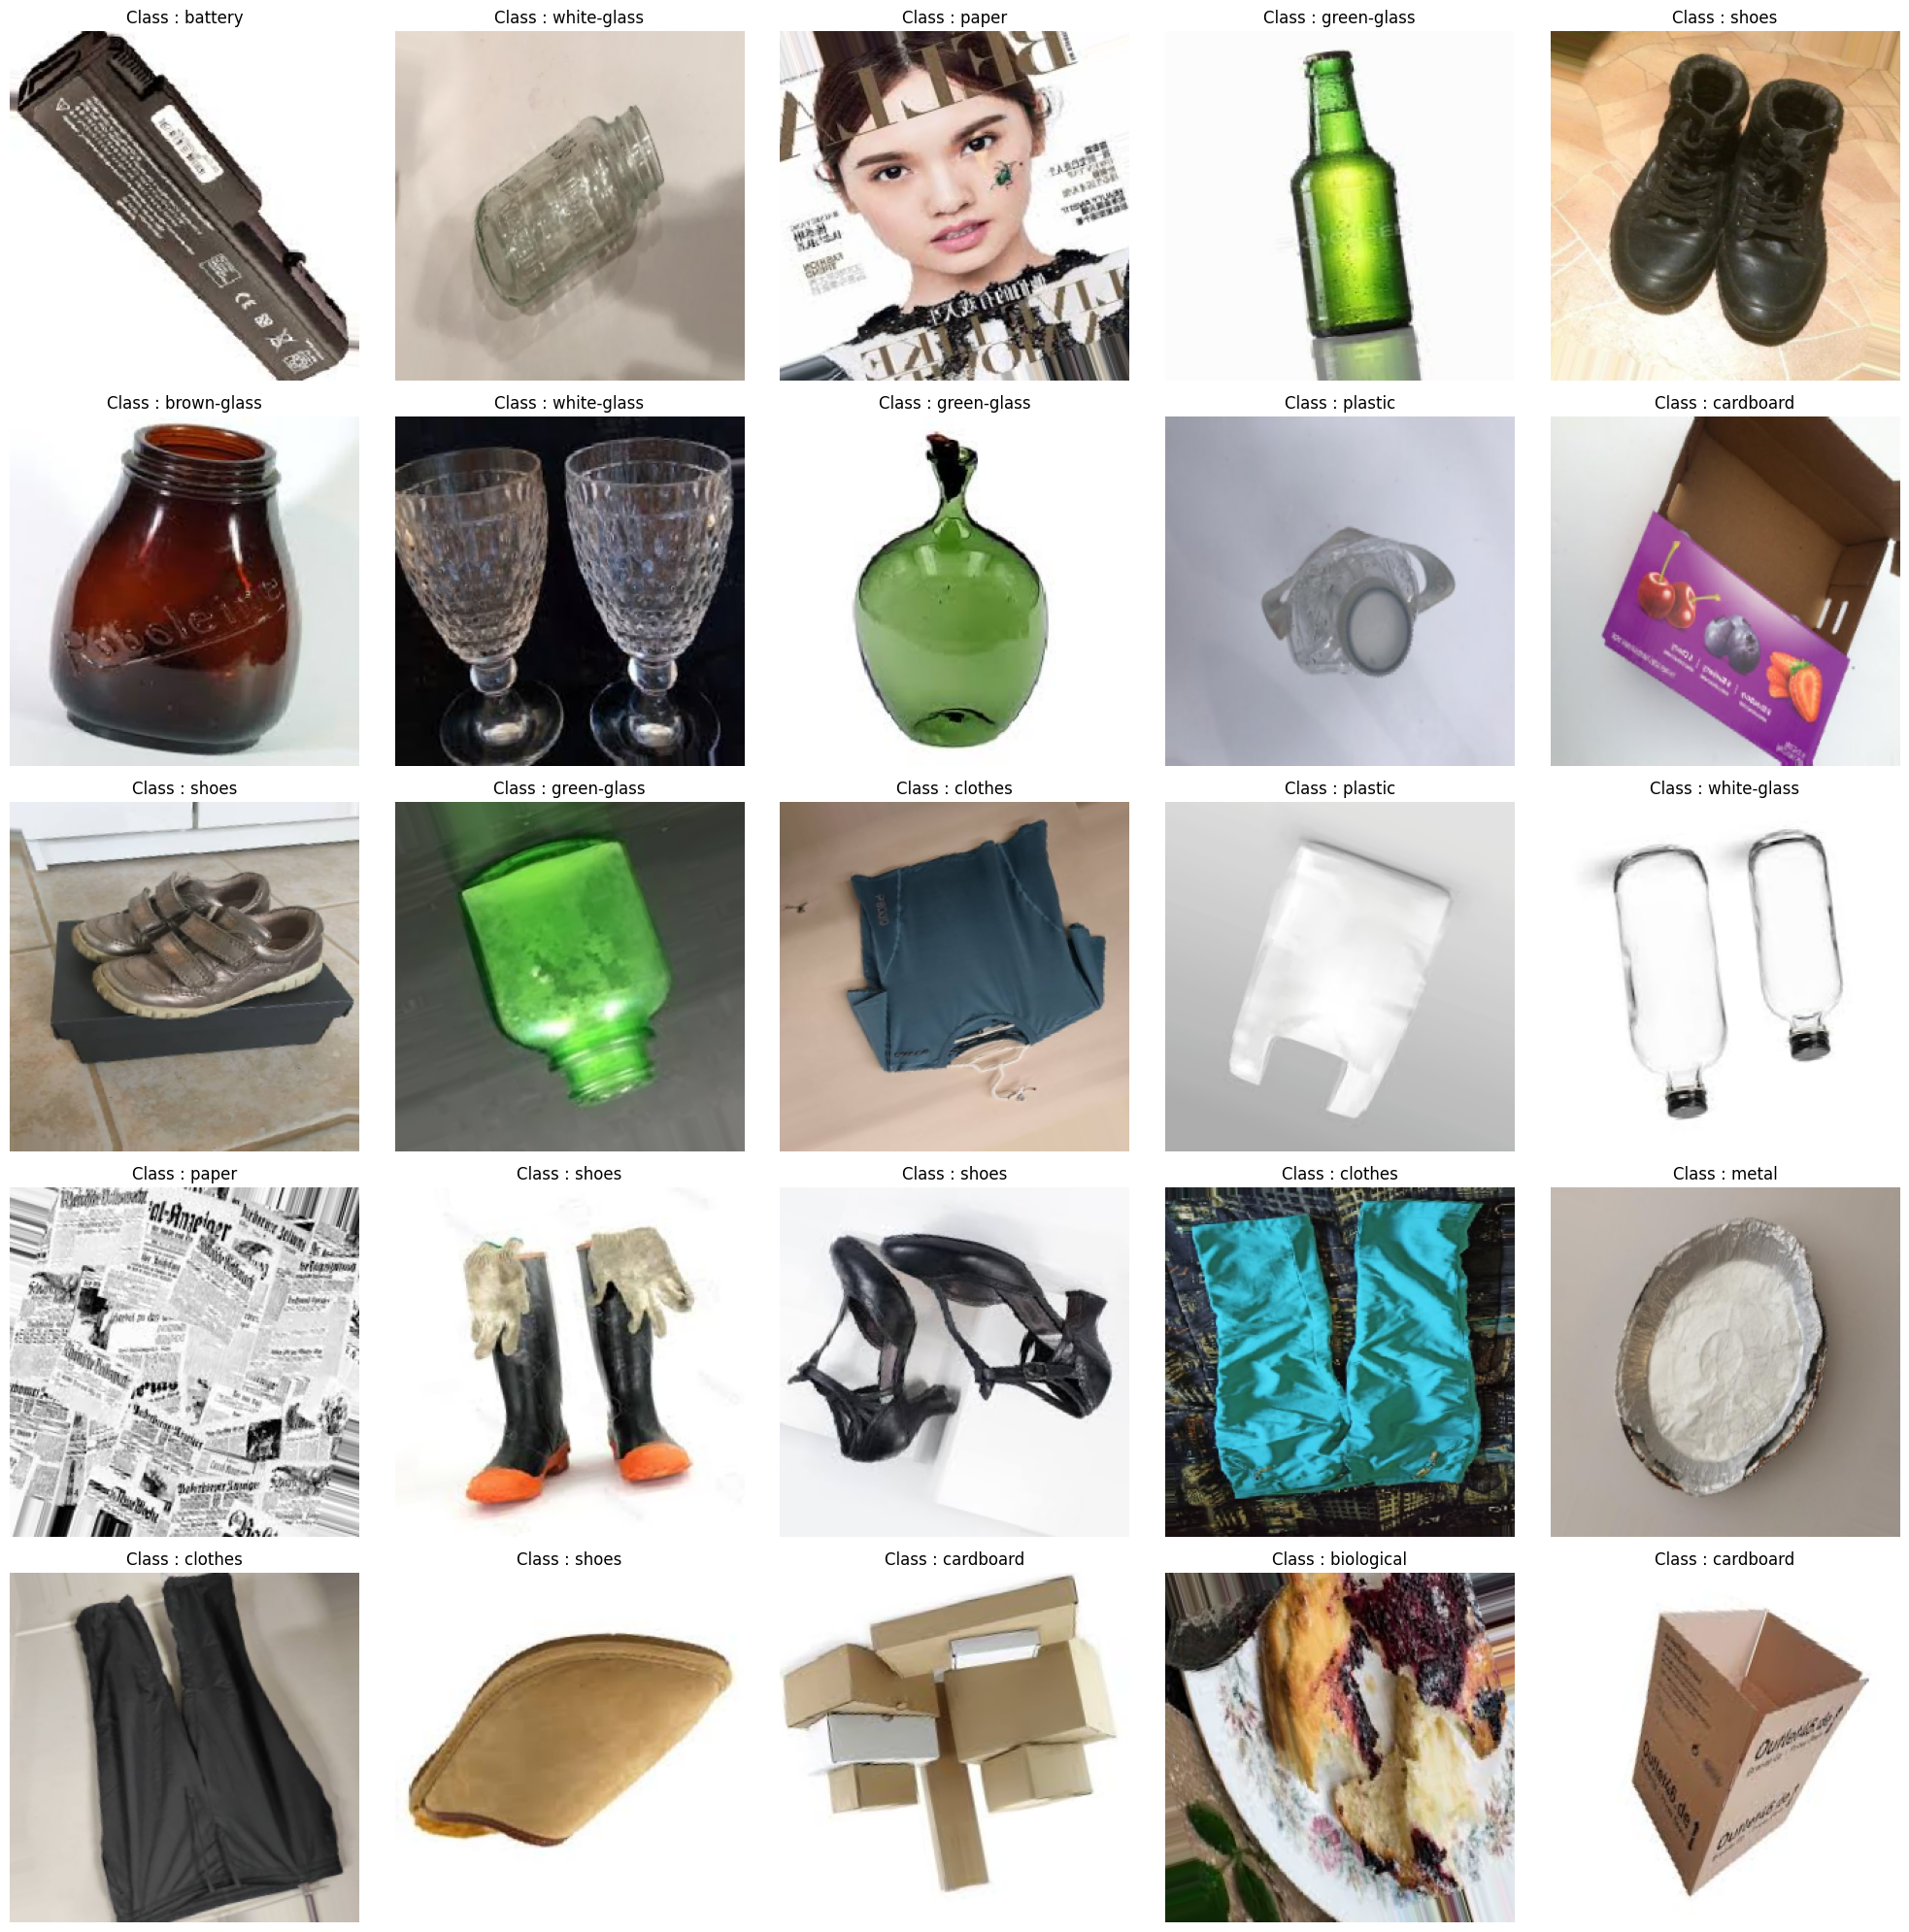

In [16]:
# Set the figure size for the plot
plt.figure(figsize=(20,20))

# Initialize a counter for the subplots
counter=1

# Loop over the train dataset
for images, labels in iter(train_data):
    
    # Get a random image and label
    image, label = get_random_data([images, labels])
    
    # Plot the image with its class name as the title
    plt.subplot(5,5,counter)
    show_image(image, image_title=f"Class : {class_names[int(label)]}")
    
    # Increment the counter
    counter+=1
    
    # End the loop when 25 images have been plotted
    if counter>=26: break

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [18]:
# Specify the name of the model as "ResNet152V2".
name = "Res"

# Load the pre-trained ResNet152V2 model, freeze its weights and exclude its final classification layer.
base_model = ResNet152V2(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False

# Create a sequential model with the ResNet152V2 base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
resnet152V2 = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
resnet152V2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up the EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights.
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".keras", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
resnet152V2.fit(
    train_data, validation_data=valid_data,
    epochs=1, callbacks=cbs
)

305/305 ━━━━━━━━━━━━━━━━━━━━ 2678s 9s/step - accuracy: 0.7740 - loss: 0.7214 - val_accuracy: 0.8682 - val_loss: 0.3960


In [ ]:
from PIL import Image
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('/kaggle/working/ResNet152V2.keras')

# Load and preprocess the image
image_path = '/kaggle/input/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'
image = Image.open(image_path)

image = image.resize((256, 256))
        image = image.convert('RGB')
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make a prediction
predictions = model.predict(image_array)

# Output the predictions
print(predictions)

In [ ]:
# Specify the name of the model as "Inception".
name = "Inception"

# Load the pre-trained InceptionV3 model, freeze its weights and exclude its final classification layer.
base_model = InceptionV3(include_top=False, input_shape=(256,256,3), weights='imagenet')
base_model.trainable = False

# Create a sequential model with the InceptionV3 base model, a global average pooling layer, two fully connected layers, and a final softmax classification layer.
inception = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
], name=name)

# Compile the model with sparse categorical cross-entropy as the loss function, Adam optimizer and accuracy as the evaluation metric.
inception.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up the EarlyStopping and ModelCheckpoint callbacks to monitor the training process and save the best model weights.
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

# Train the model using the training and validation datasets, using 50 epochs and the previously defined callbacks.
inception.fit(
    train_data, validation_data=valid_data,
    epochs=1, callbacks=cbs
)


In [ ]:
x

In [19]:
# set the file path to the pre-trained model
model_file_path = '/kaggle/working/ResNet152V2.h5'

# load the pre-trained model
loaded_model = load_model(model_file_path)

# print a summary of the model's architecture
loaded_model.summary()

Model: "ResNet152V2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 58,858,762
Trainable params: 527,114
Non-trainable params: 58,331,648
_____________________________________

In [20]:
#This line of code evaluates the performance of the pre-trained model on the validation dataset.
loaded_model.evaluate(valid_data)

117/117 [==============================] - 58s 470ms/step - loss: 0.2497 - accuracy: 0.9180


[0.24973461031913757, 0.9179844260215759]

In [1]:
plt.figure(figsize=(20,20))
i=1
for images, labels in iter(valid_data):
    
    # Get Random Image and label
    image, label = get_random_data([images, labels])
    pred_label = class_names[np.argmax(loaded_model.predict(image[np.newaxis,...]))]
    
    # Plot it
    plt.subplot(5,5,i)
    show_image(image, image_title=f"Class : {class_names[int(label)]}, Pred : {pred_label}")
    
    # Make sure to end the Loop
    i+=1
    if i>=26: break
        

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [23]:
model_json = loaded_model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)